# 1. Data Preparation:
### load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


# 2. Exploratory Data Analysis (EDA):
### Perform exploratory data analysis to understand the structure of the dataset.
### Check for missing values, outliers, and inconsistencies in the data.


In [3]:
print('Data Overview')
df.info()

Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
print('Missing Values')
df.isnull().sum()

Missing Values


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

### Visualize the distribution of features, including histograms, box plots, and correlation matrices.

### 1.Histograms

<Figure size 1000x600 with 0 Axes>

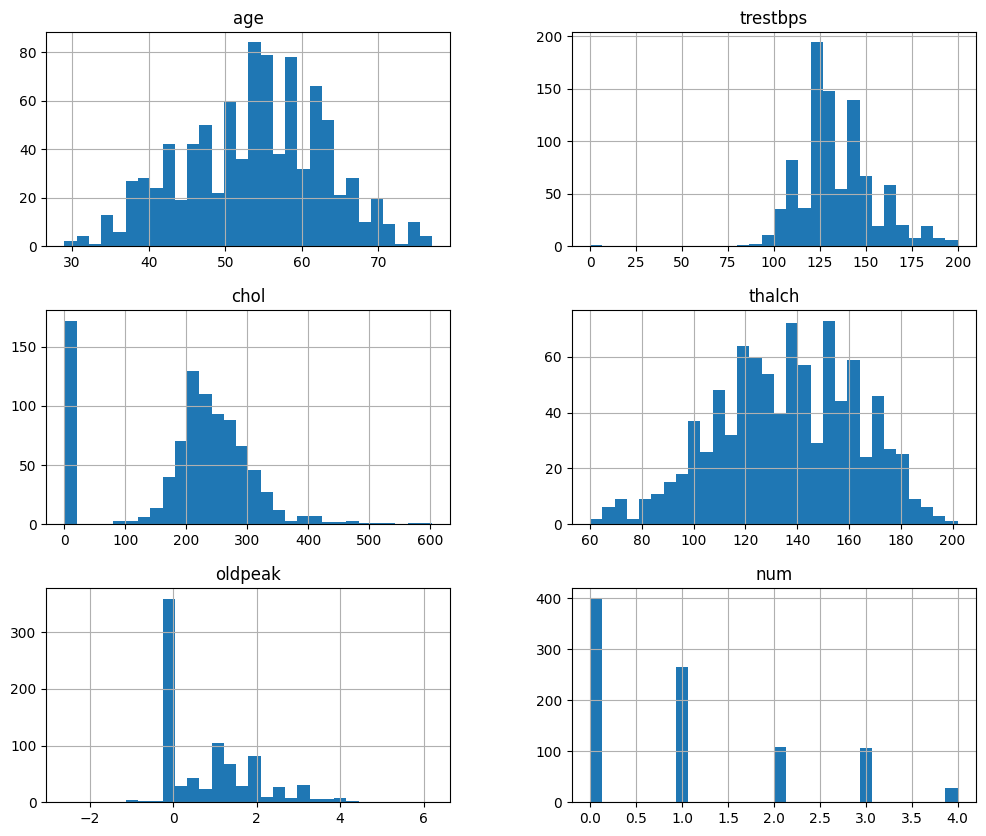

In [6]:
plt.figure(figsize = (10,6))
df.hist(bins = 30,figsize = (12,10))
plt.show()

### 2.Boxplot

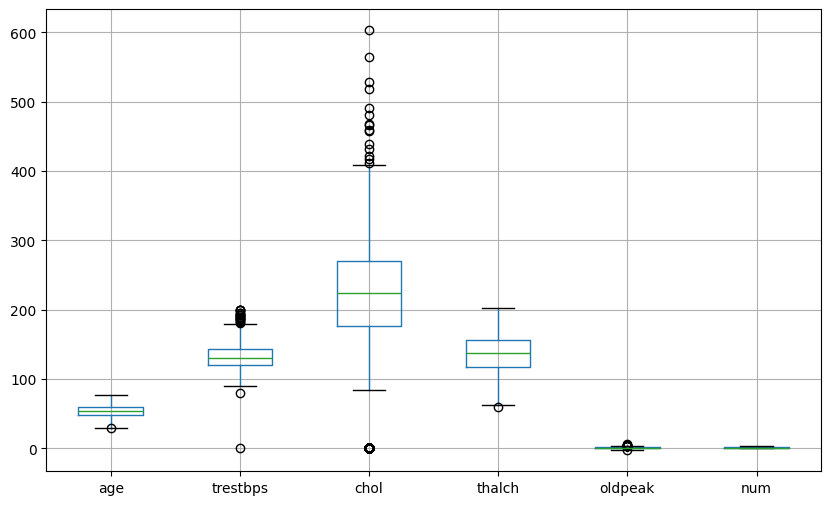

In [7]:
numarical_features = df.select_dtypes(include = ['number','datetime']).columns
plt.figure(figsize = (10,6))
# Remove the numarical_features arguments in bins boxplot function call 
df[numarical_features].boxplot(figsize = (12,10))
plt.show()

### 3.correlational matrices

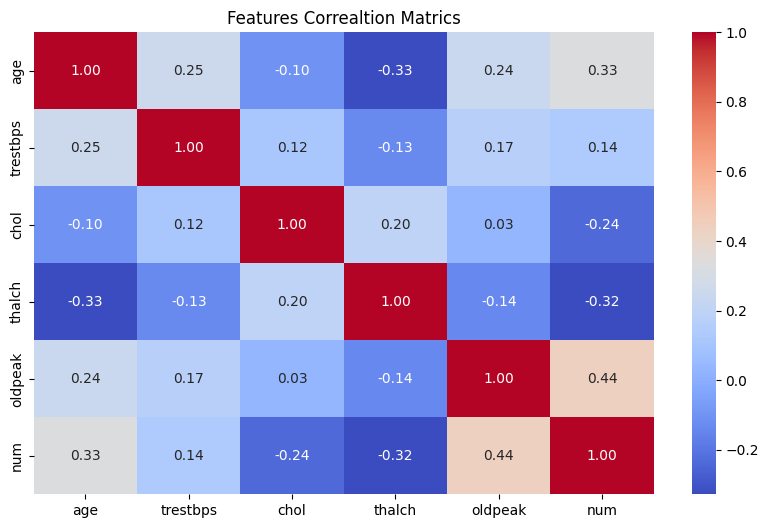

In [8]:
plt.figure(figsize =(10,6))
sns.heatmap(df.select_dtypes(include = np.number).corr(),annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title('Features Correaltion Matrics')
plt.show()

# 3. Feature Engineering:
### If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [9]:
for col in df.select_dtypes(include = ['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [10]:
# Handle missing values 
df.fillna(df.median(),inplace = True)

In [11]:
scaler = StandardScaler()

In [12]:
df.iloc[:, :-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,True,0,150,0,2.3,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,0,1.5,2,0
904,62,1,0,166,170,False,2,120,1,3.0,1,0
905,56,1,2,170,0,False,0,123,1,2.5,0,0
906,56,1,2,144,208,True,2,105,2,0.5,0,1


In [13]:
scaler.fit_transform(df.iloc[:, :-1])

array([[ 1.00602683,  0.51441613,  2.32027607, ...,  1.35440293,
        -1.6727697 , -1.53045059],
       [-1.39756029,  0.51441613,  0.23225756, ..., -0.81571758,
        -0.22484321, -1.53045059],
       [ 0.35050307,  0.51441613, -0.81175169, ..., -0.43830532,
        -0.22484321, -1.53045059],
       ...,
       [ 0.24124911,  0.51441613,  1.27626682, ...,  1.54310906,
        -1.6727697 , -1.53045059],
       [ 0.24124911,  0.51441613,  1.27626682, ..., -0.34395225,
        -1.6727697 , -0.20444951],
       [ 0.35050307,  0.51441613, -0.81175169, ..., -0.34395225,
        -0.22484321,  1.12155158]])

# 4. Decision Tree Classification:

### Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [14]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

### Implement a Decision Tree Classification model using a library like scikit-learn.

In [16]:
DTC = DecisionTreeClassifier(random_state = 42)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred = DTC.predict(X_test)

### Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [18]:
print('Accuarcy Score :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred,average = 'weighted'))
print('Recall :',recall_score(y_test,y_pred,average ='weighted'))
print('F1 Score :',f1_score(y_test,y_pred,average ='weighted'))

Accuarcy Score : 0.4981684981684982
Precision Score : 0.4911577526884294
Recall : 0.4981684981684982
F1 Score : 0.49407694261062796


In [19]:
expected=[]
for i in y_test:  # Changed test_y to y_test
  if i>2.3:
    expected.append("high")
  else:
    expected.append("low")
predicted=[]
for i in y_pred: # Changed pred to y_pred
  if i>2.3:
    predicted.append("high")
  else:
    predicted.append("low")
acc=accuracy_score(predicted,expected)
matrix=confusion_matrix(predicted,expected)
clas=classification_report(predicted,expected)
print("accuracy")
print(acc)
print("classification \n")
print(clas)
print("matrix")
print(matrix)

accuracy
0.8131868131868132
classification 

              precision    recall  f1-score   support

        high       0.29      0.28      0.28        36
         low       0.89      0.89      0.89       237

    accuracy                           0.81       273
   macro avg       0.59      0.59      0.59       273
weighted avg       0.81      0.81      0.81       273

matrix
[[ 10  26]
 [ 25 212]]


In [20]:
labels = [0, 1]  
cm = confusion_matrix(y_test, y_pred, labels=labels)
print(cm)

[[85 25]
 [28 36]]


In [21]:
exp=[]
pre=[]
for i in expected:
  if i=='high':
    exp.append(1)
  else:
    exp.append(0)
for i in predicted:
  if i=='high':
    pre.append(1)
  else:
    pre.append(0)

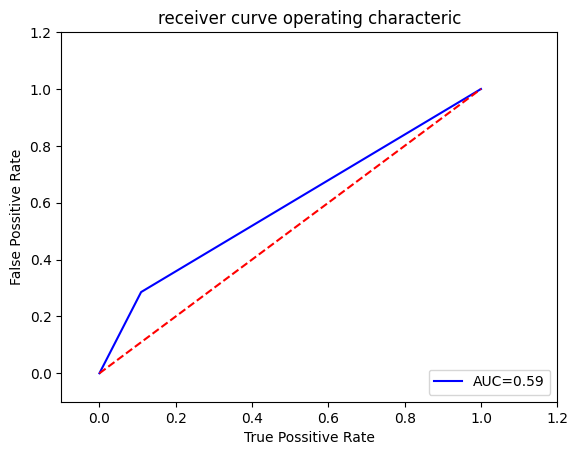

In [22]:
from sklearn.metrics import roc_curve,auc
import random
fpr,tpr,threshold=roc_curve(exp,pre)
roc_auc=auc(fpr,tpr)
plt.title("receiver curve operating characteric")
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('True Possitive Rate')
plt.ylabel('False Possitive Rate')
plt.show()

# 5. Hyperparameter Tuning:
### Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [23]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DTC, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}


# 6. Model Evaluation and Analysis:
### Analyse the performance of the Decision Tree model using the evaluation metrics obtained.


In [24]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))

Optimized Accuracy: 0.5421245421245421


### Visualize the decision tree structure to understand the rules learned by the model and identify important features

#### Confusion Matrics

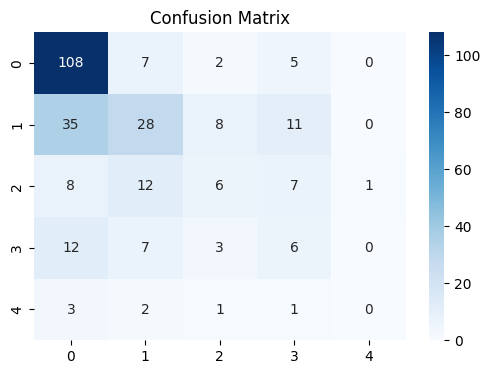

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### Visualizing Decision Tree

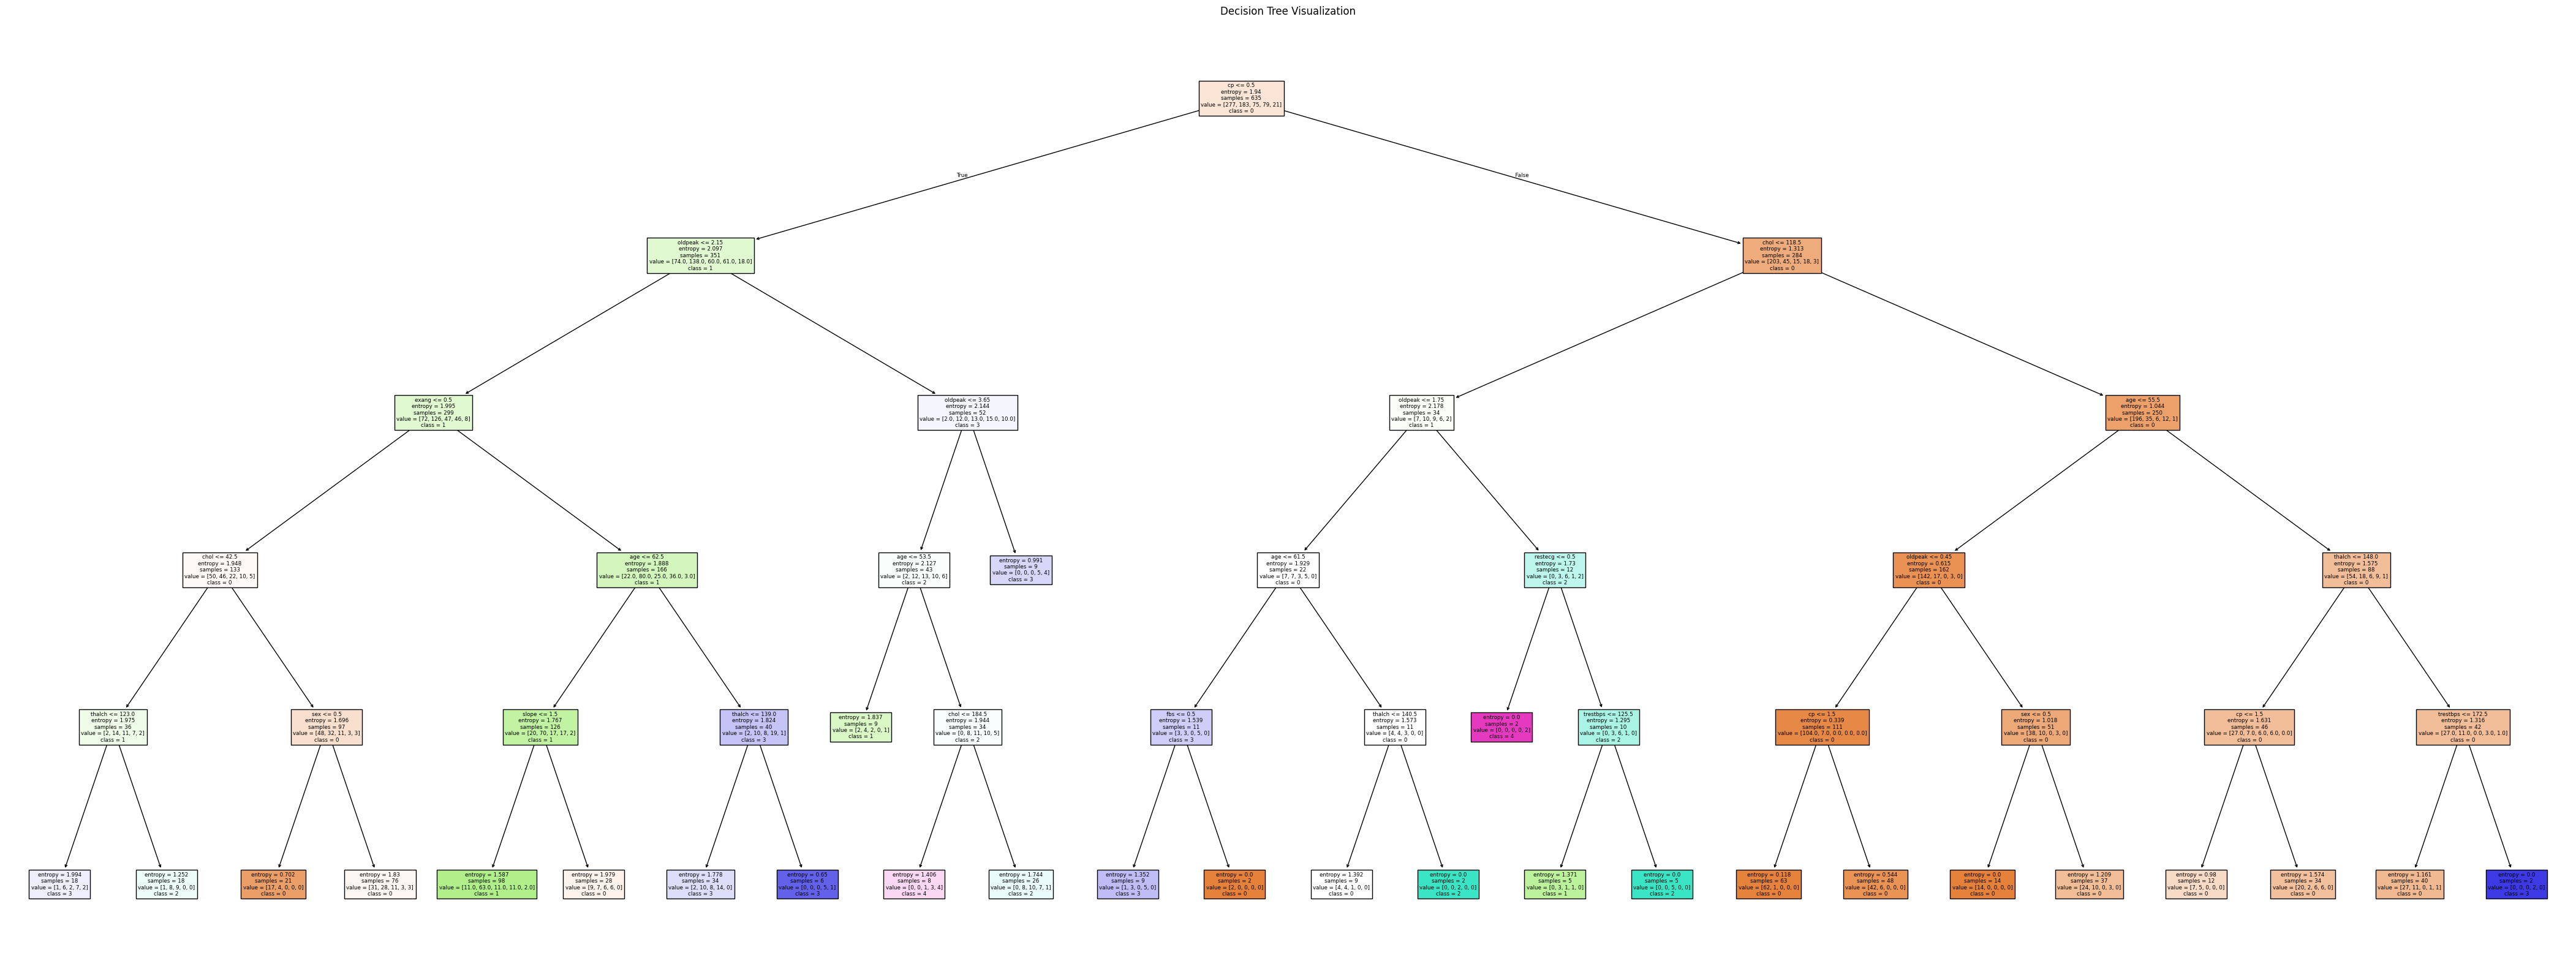

In [26]:
plt.figure(figsize=(54, 20))
class_names = [str(cls) for cls in np.unique(y)]
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=class_names) 
plt.title('Decision Tree Visualization')
plt.show()